## Computer vision libaries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import time
import torch
import torchvision
import requests

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
from pathlib import Path

## 1. FashionMNIST Dataset

In [2]:
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None, # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=False, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

## 1.1 Check Data and Input & Output Shapes of Data

In [3]:
image, label = train_data[0]
print(f'{image} | Label: {label}')

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [4]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# Check the shape of our image
print(f'Image Shape: {image.shape} -> [color_channels, height, width]') 
print(f'Image Label: {class_names[label]}')

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: Ankle boot


## 1.2 Visualizing Our Data

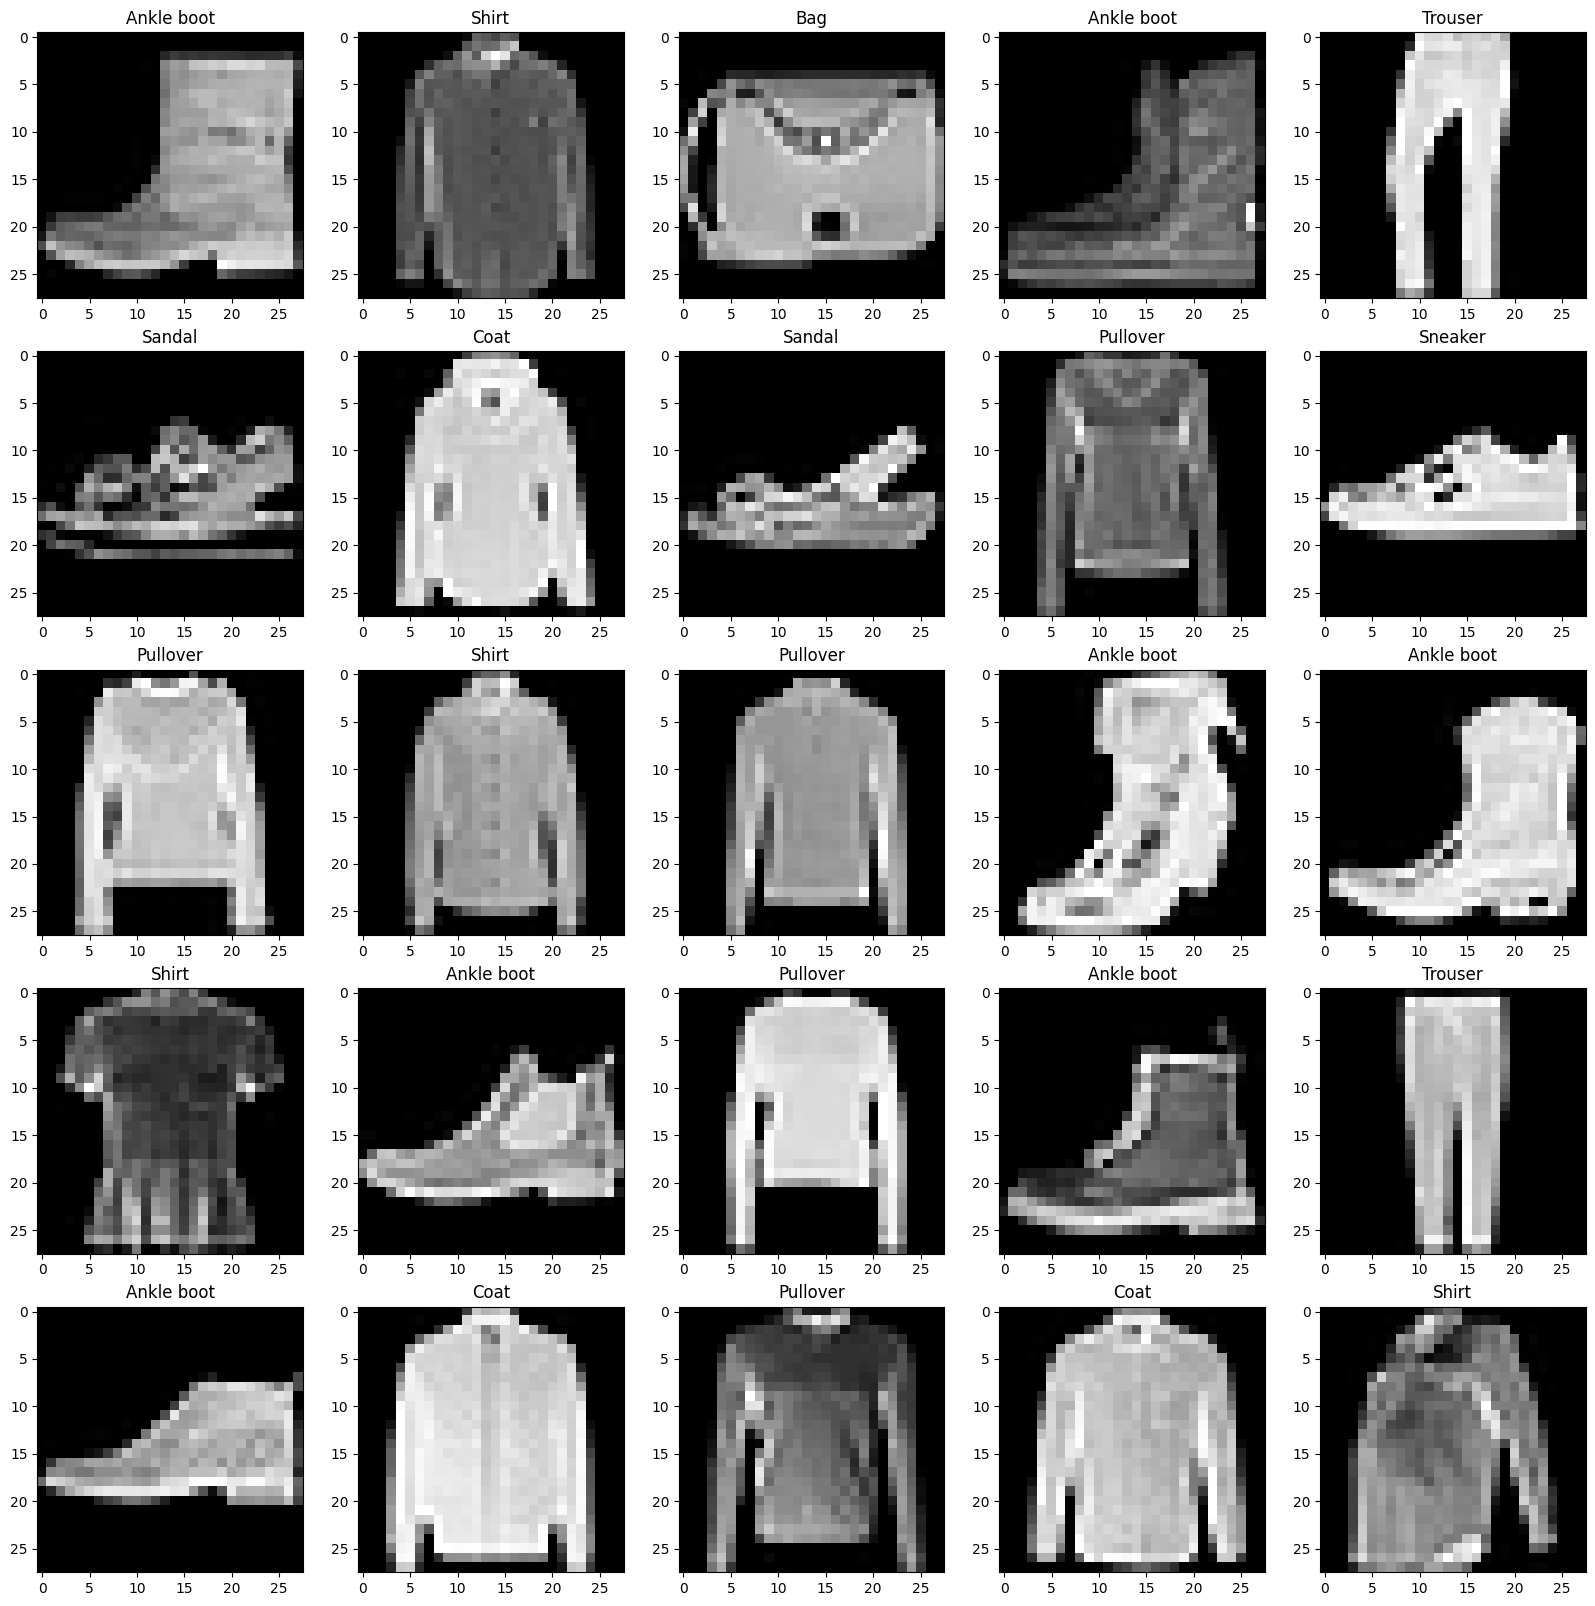

In [7]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(20, 20))
rows, cols = 5, 5
for idx in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image_, label_ = train_data[random_idx]
  fig.add_subplot(rows, cols, idx)
  plt.imshow(image_.squeeze(), cmap='gray')
  plt.title(class_names[label_])

## 2. Prepare DataLoader

* Right now, our data is in the form of PyTorch Datasets.
* DataLoader turns our dataset into a Python iterable.
* More specifically, we want to turn our data into batches (or mini-batches).
* Why would we do this?
  * It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
  * It gives our neural network more chances to update its gradients per epoch.

In [8]:
# Setup the Batch Size Hyperparameter
BATCH_SIZE=32
SHUFFLE_TRAIN_DATASET=True
SHUFFLE_TEST_DATASET=False

# Turn Dataset into Batches
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=SHUFFLE_TRAIN_DATASET)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=SHUFFLE_TEST_DATASET)

In [9]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f7dabb438e0>, <torch.utils.data.dataloader.DataLoader object at 0x7f7daa30bdc0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [10]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [11]:
train_features_batch[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0157, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.1490, 0.4667, 0.5098, 0.5373, 0.4941, 0.4824, 0.5137,
          0.5490, 0.5137, 0.1294, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0039, 0.0157, 0.0000,
          0.2353, 0.5255, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0235, 0.1686, 0.4745, 0.3647, 0.0000, 0.0314,

## 3. Create Baseline ModelV0

In [12]:
# Create a device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_neurons: int,
               output_shape: int):
    super().__init__()
    
    self.flatten_layer = nn.Flatten()
    self.input_layer = nn.Linear(in_features=input_shape,
                                 out_features=hidden_neurons)
    self.output_layer = nn.Linear(in_features=hidden_neurons,
                                  out_features=output_shape)
    # self.activation_func = nn.ReLU() # Adding for non-linearity
  
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.output_layer(self.input_layer(self.flatten_layer(x)))

base_line_model = FashionMNISTModelV0(
    input_shape=(train_features_batch.shape[-2]*train_features_batch.shape[-1]),
    hidden_neurons=10,
    output_shape=len(class_names)
).to(device)

base_line_model

FashionMNISTModelV0(
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (input_layer): Linear(in_features=784, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=10, bias=True)
)

## 3.1. Create a Loss Function, Optimizer & Evaluation Function

In [14]:
# Download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/UygarKAYA/DeepLearning/main/utils/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [15]:
# Setup Hyperparameter
LEARNING_RATE=0.1
BASE_LINE_MODEL_PARAMETERS=base_line_model.parameters()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=BASE_LINE_MODEL_PARAMETERS,
                            lr=LEARNING_RATE)

## 3.2 Creating a Function to Time Our Experiments

* Deep Learning & Machine Learning is Very Experimental
* Two of the main things you'll often want to track are:
  * Model's Performance (Loss & Accuracy Results and etc)
  * How Fast It Runs

In [16]:
from helper_functions import accuracy_func, execution_time

## 3.3 Creating a training loop and training a model on batches of data
  * Loop through epochs.
  *Loop through training batches, perform training steps, calculate the train loss per batch.
  * Loop through testing batches, perform testing steps, calculate the test loss per batch.
  * Print out what's happening.
  * Time it all (for fun).

* Note: Because we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch.


In [17]:
# Import tqdm for Progress Bar
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)
start_time=time.time()
EPOCHS=20

# Create Training & Test Loop
for epoch in tqdm(range(EPOCHS)):
  train_loss, train_accuracy, test_loss, test_accuracy = 0, 0, 0, 0

  # Add a Training Loop to Loop Through the Training Batches
  for batch, (train_image, train_label) in enumerate(train_dataloader):
    # Put Data to Target Device 
    train_image, train_label = train_image.to(device), train_label.to(device)

    # Training Phase
    base_line_model.train()

    # 1. Forward Pass
    train_logits = base_line_model.forward(train_image)
    train_preds = train_logits.argmax(dim=1)

    # 2. Calculate Train Loss & Accuracy for Per Batch
    train_loss_ = loss_func(train_logits, train_label)
    train_accuracy_ = accuracy_func(train_preds, train_label)

    train_loss += train_loss_ # Accumulate Train Loss
    train_accuracy += train_accuracy_ # Accumulate Train Accuracy

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Backward Loss
    train_loss_.backward()

    # 5. Optimizer Step
    optimizer.step()

    # # Print Out What's Happening
    # if batch % 600 == 0:
    #   print(f"Looked at {batch * len(train_image)}/{len(train_dataloader.dataset)} Samples.")

  # Divide Total Train Loss & Accuracy by Length of Train Dataloader to Get Average Train Loss Per Epoch
  train_loss /= len(train_dataloader)
  train_accuracy /= len(train_dataloader)

  # Testing Phase
  base_line_model.eval()
  with torch.inference_mode():
    for (test_image, test_label) in test_dataloader:
      # Put Data to Target Device 
      test_image, test_label = test_image.to(device), test_label.to(device)

      # 1. Forward Pass
      test_logits = base_line_model.forward(test_image)
      test_preds = test_logits.argmax(dim=1)

      # 2. Calculate Test Loss & Accuracy for Per Batch
      test_loss_ = loss_func(test_logits, test_label)
      test_accuracy_ = accuracy_func(test_preds, test_label)

      test_loss += test_loss_
      test_accuracy += test_accuracy_

    # Divide Total Test Loss & Accuracy by Length of Test Dataloader to Get Average Test Loss Per Epoch
    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)
  
  print(f"Epoch: {epoch} | Train Accuracy: {train_accuracy:.3f} | Train Loss: {train_loss:.3f} | Test Accuracy: {test_accuracy:.3f} | Test Loss: {test_loss:.3f}")

# Calculate the Execution Time
end_time=time.time()
base_line_model_execution_time = execution_time(
  start_time, 
  end_time, 
  str(next(base_line_model.parameters()).device)
)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train Accuracy: 79.172 | Train Loss: 0.590 | Test Accuracy: 82.039 | Test Loss: 0.510
Epoch: 1 | Train Accuracy: 83.320 | Train Loss: 0.476 | Test Accuracy: 83.197 | Test Loss: 0.480
Epoch: 2 | Train Accuracy: 84.052 | Train Loss: 0.455 | Test Accuracy: 83.427 | Test Loss: 0.477
Epoch: 3 | Train Accuracy: 84.473 | Train Loss: 0.443 | Test Accuracy: 83.746 | Test Loss: 0.463
Epoch: 4 | Train Accuracy: 84.700 | Train Loss: 0.436 | Test Accuracy: 83.267 | Test Loss: 0.469
Epoch: 5 | Train Accuracy: 84.972 | Train Loss: 0.429 | Test Accuracy: 83.636 | Test Loss: 0.459
Epoch: 6 | Train Accuracy: 85.225 | Train Loss: 0.425 | Test Accuracy: 83.317 | Test Loss: 0.488
Epoch: 7 | Train Accuracy: 85.058 | Train Loss: 0.423 | Test Accuracy: 83.377 | Test Loss: 0.472
Epoch: 8 | Train Accuracy: 85.255 | Train Loss: 0.420 | Test Accuracy: 83.456 | Test Loss: 0.471
Epoch: 9 | Train Accuracy: 85.287 | Train Loss: 0.418 | Test Accuracy: 83.646 | Test Loss: 0.463
Epoch: 10 | Train Accuracy: 85

## 4. ModelV1: Building a Model with Non-Linearity

In [18]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create a Model with Non-Linear
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_size: int, 
               hidden_neurons: int, 
               output_size: int):
    super().__init__()

    self.sequential_layer = nn.Sequential(
        nn.Flatten(), # Flatten Inputs Into a Single Vector
        nn.Linear(in_features=input_size, out_features=hidden_neurons),
        nn.ReLU(),
        nn.Linear(in_features=hidden_neurons, out_features=output_size),
        nn.ReLU()
    )
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.sequential_layer(x)

non_linear_model = FashionMNISTModelV1(
    input_size=(train_features_batch.shape[-2]*train_features_batch.shape[-1]),
    hidden_neurons=10,
    output_size=len(class_names)
).to(device)

non_linear_model

FashionMNISTModelV1(
  (sequential_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## 4.1 Create a Loss Function, Optimizer & Evaluation Function

In [19]:
NON_LINEAR_MODEL_PARAMETERS=non_linear_model.parameters()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=NON_LINEAR_MODEL_PARAMETERS,
                            lr=LEARNING_RATE)

## 4.2 Functionizing Training & Testing/Inference Loops

In [20]:
def train_model(model: torch.nn.Module,
                train_data_loader: torch.utils.data.DataLoader, 
                loss_func: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_func,
                device: torch.device=device):
  """
  Performs a Training with Model Trying to Learn on DataLoader
  """
  
  train_loss, train_accuracy = 0, 0

  # Put Model into Training Phase
  model.train()

  # Add a Loop to Loop Through the Training Batches
  for batch, (train_image, train_label) in enumerate(train_data_loader):
    
    # Put Data to Target Device
    train_image, train_label = train_image.to(device), train_label.to(device)
    
    # 1. Forward Pass
    train_logits = model.forward(train_image)
    train_preds = train_logits.argmax(dim=1)

    # 2. Calculate Loss & Accuracy Per Batch
    train_loss_ = loss_func(train_logits, train_label)
    train_loss += train_loss_ #  Accumulate Train Loss
    train_accuracy += accuracy_func(train_preds, train_label)

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss Backward
    train_loss_.backward()

    # 5. Optimizer Step
    optimizer.step()

  # Divide Total Train Loss & Accuracy by Length of Train DataLoader
  train_loss /= len(train_data_loader)
  train_accuracy /= len(train_data_loader)

  print(f"Train Accuracy: {train_accuracy:.2f} | Train Loss: {train_loss:.2f}")

In [21]:
def test_model(model: torch.nn.Module,
               test_data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module, 
               accuracy_func,
               device: torch.device=device):
  """
  Performs a Testing Loop Step on Model Going Over DataLoader
  """

  test_loss, test_accuracy = 0, 0

  # Put the Model in Eval Mode
  model.eval()

  # Turn on Inference Mode Context Manager
  with torch.inference_mode():
    for (test_image, test_label) in test_data_loader:

      # Send the Data Target Device
      test_image, test_label = test_image.to(device), test_label.to(device)

      # 1. Forward Pass
      test_logits = model.forward(test_image)
      test_preds = test_logits.argmax(dim=1)

      # 2. Calculate Loss & Accuracy Per Batch
      test_loss += loss_func(test_logits, test_label)
      test_accuracy += accuracy_func(test_preds, test_label)

    # Divide Total Test Loss & Accuracy by Length of Test DataLoader
    test_loss /= len(test_data_loader)
    test_accuracy /= len(test_data_loader)
  
    print(f"Test Accuracy:  {test_accuracy:.2f} | Test Loss:  {test_loss:.2f}")

In [22]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
execution_start_time = time.time()

for epoch in tqdm(range(EPOCHS)):
  print(f"EPOCH: {epoch}\n------------")
  train_model(model=non_linear_model,
              train_data_loader=train_dataloader,
              loss_func=loss_func,
              optimizer=optimizer,
              accuracy_func=accuracy_func,
              device=device)
  
  test_model(model=non_linear_model,
             test_data_loader=test_dataloader,
             loss_func=loss_func,
             accuracy_func=accuracy_func,
             device=device)
  print()
execution_end_time = time.time()
non_linear_model_execution_time = execution_time(
  start_time=execution_start_time,
  end_time=execution_end_time,
  device=device
)

  0%|          | 0/20 [00:00<?, ?it/s]

EPOCH: 0
------------
Train Accuracy: 61.34 | Train Loss: 1.09
Test Accuracy:  65.00 | Test Loss:  0.96

EPOCH: 1
------------
Train Accuracy: 71.93 | Train Loss: 0.78
Test Accuracy:  73.91 | Test Loss:  0.72

EPOCH: 2
------------
Train Accuracy: 75.94 | Train Loss: 0.67
Test Accuracy:  75.02 | Test Loss:  0.69

EPOCH: 3
------------
Train Accuracy: 76.52 | Train Loss: 0.64
Test Accuracy:  76.13 | Test Loss:  0.65

EPOCH: 4
------------
Train Accuracy: 77.00 | Train Loss: 0.63
Test Accuracy:  75.95 | Test Loss:  0.65

EPOCH: 5
------------
Train Accuracy: 77.43 | Train Loss: 0.62
Test Accuracy:  76.54 | Test Loss:  0.65

EPOCH: 6
------------
Train Accuracy: 77.80 | Train Loss: 0.61
Test Accuracy:  76.67 | Test Loss:  0.63

EPOCH: 7
------------
Train Accuracy: 83.09 | Train Loss: 0.47
Test Accuracy:  84.30 | Test Loss:  0.45

EPOCH: 8
------------
Train Accuracy: 85.96 | Train Loss: 0.40
Test Accuracy:  84.75 | Test Loss:  0.44

EPOCH: 9
------------
Train Accuracy: 86.17 | Train Los

In [23]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

def eval_model(model: torch.nn.Module,
               test_data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module, 
               accuracy_func,
               device: torch.device=device):
  """
  Returns a Dictionary Containing the Results of Model Predicting on DataLoader
  """

  test_loss, test_accuracy = 0, 0

  # Put the Model in Eval Mode
  model.eval()

  # Turn on Inference Mode Context Manager
  with torch.inference_mode():
    for (test_image, test_label) in test_data_loader:

      # Send the Data Target Device
      test_image, test_label = test_image.to(device), test_label.to(device)

      # 1. Forward Pass
      test_logits = model.forward(test_image)
      test_preds = test_logits.argmax(dim=1)

      # 2. Calculate Loss & Accuracy Per Batch
      test_loss += loss_func(test_logits, test_label)
      test_accuracy += accuracy_func(test_preds, test_label)

    # Divide Total Test Loss & Accuracy by Length of Test DataLoader
    test_loss /= len(test_data_loader)
    test_accuracy /= len(test_data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": test_loss.item(),
          "model_accuracy": test_accuracy}

In [24]:
# Calculate Model Results on Test Dataset
base_line_model_results = eval_model(
  model=base_line_model,
  test_data_loader=test_dataloader,
  loss_func=loss_func, 
  accuracy_func=accuracy_func,
  device=device
)

non_linear_model_results = eval_model(
  model=non_linear_model,
  test_data_loader=test_dataloader,
  loss_func=loss_func, 
  accuracy_func=accuracy_func,
  device=device
)

print(base_line_model_results)
print(non_linear_model_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4616546928882599, 'model_accuracy': 83.86581469648563}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.4350026249885559, 'model_accuracy': 84.43490415335464}


## 5. ModelV2: Building a Model with  Convolutional Neural Network (ConvNets/CNN)

* For More About ConvNets: https://poloclub.github.io/cnn-explainer/

In [25]:
from torch.nn.modules.pooling import MaxPool2d
# Create a Convolutional Neural Network - ConvNets
# Setup Hyperparameters
KERNEL_SIZE=3
STRIDE=1
PADDING=1

class FashionMNISTModelV2(nn.Module):
  """
  Model Architecture that Replicates the TinyVGG Model from images/ConvNets.png
  """
  def __init__(self, 
               input_channels: int,
               input_shape: int, 
               hidden_neurons: int,
               output_shape: int):
    super().__init__()
    self.first_conv_block = nn.Sequential(
        nn.Conv2d(in_channels=input_channels,
                  out_channels=hidden_neurons,
                  kernel_size=KERNEL_SIZE,
                  stride=STRIDE,
                  padding=PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_neurons,
                  out_channels=hidden_neurons,
                  kernel_size=KERNEL_SIZE,
                  stride=STRIDE,
                  padding=PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(KERNEL_SIZE-1))
    )
    self.second_conv_block = nn.Sequential(
        nn.Conv2d(in_channels=hidden_neurons,
                  out_channels=hidden_neurons,
                  kernel_size=KERNEL_SIZE,
                  stride=STRIDE,
                  padding=PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_neurons,
                  out_channels=hidden_neurons,
                  kernel_size=KERNEL_SIZE,
                  stride=STRIDE,
                  padding=PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(KERNEL_SIZE-1))
    )
    self.fully_connected_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_neurons*input_shape,
                  out_features=output_shape)
    )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.fully_connected_layer(self.second_conv_block(self.first_conv_block(x)))

In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

convNets_model = FashionMNISTModelV2(
    input_channels=image.shape[0],
    input_shape=7*7,
    hidden_neurons=10,
    output_shape=len(class_names)
).to(device)

## 5.1 Create a Loss Function, Optimizer & Evaluation Function

In [27]:
CONVNETS_MODEL_PARAMETERS=convNets_model.parameters()

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=CONVNETS_MODEL_PARAMETERS,
                            lr=LEARNING_RATE)

## 5.2 Training & Testing ConvNets Model Using Training & Testing Functions

In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure Execution Time
start_time = time.time()

# Train & Test ConvNets Model
EPOCHS=20

for epoch in tqdm(range(EPOCHS)):
  print(f"EPOCH: {epoch}\n------------")
  train_model(model=convNets_model,
              train_data_loader=train_dataloader,
              loss_func=loss_func,
              optimizer=optimizer,
              accuracy_func=accuracy_func,
              device=device)
  
  test_model(model=convNets_model,
             test_data_loader=test_dataloader,
             loss_func=loss_func,
             accuracy_func=accuracy_func,
             device=device)
  print()
execution_end_time = time.time()
convNets_execution_time = execution_time(
  start_time=execution_start_time, 
  end_time=execution_end_time,
  device=device
)

  0%|          | 0/20 [00:00<?, ?it/s]

EPOCH: 0
------------
Train Accuracy: 78.57 | Train Loss: 0.59
Test Accuracy:  86.18 | Test Loss:  0.39

EPOCH: 1
------------
Train Accuracy: 87.07 | Train Loss: 0.36
Test Accuracy:  87.28 | Test Loss:  0.34

EPOCH: 2
------------
Train Accuracy: 88.43 | Train Loss: 0.32
Test Accuracy:  88.41 | Test Loss:  0.32

EPOCH: 3
------------
Train Accuracy: 89.04 | Train Loss: 0.30
Test Accuracy:  87.71 | Test Loss:  0.32

EPOCH: 4
------------
Train Accuracy: 89.48 | Train Loss: 0.29
Test Accuracy:  89.16 | Test Loss:  0.30

EPOCH: 5
------------
Train Accuracy: 89.89 | Train Loss: 0.28
Test Accuracy:  89.05 | Test Loss:  0.31

EPOCH: 6
------------
Train Accuracy: 90.25 | Train Loss: 0.27
Test Accuracy:  88.88 | Test Loss:  0.31

EPOCH: 7
------------
Train Accuracy: 90.25 | Train Loss: 0.27
Test Accuracy:  89.50 | Test Loss:  0.29

EPOCH: 8
------------
Train Accuracy: 90.59 | Train Loss: 0.26
Test Accuracy:  90.13 | Test Loss:  0.29

EPOCH: 9
------------
Train Accuracy: 90.76 | Train Los

In [29]:
# Calculate Model Results on Test Dataset
base_line_model_results = eval_model(
  model=base_line_model,
  test_data_loader=test_dataloader,
  loss_func=loss_func, 
  accuracy_func=accuracy_func,
  device=device
)

non_linear_model_results = eval_model(
  model=non_linear_model,
  test_data_loader=test_dataloader,
  loss_func=loss_func, 
  accuracy_func=accuracy_func,
  device=device
)

convNets_model_results = eval_model(
    model=convNets_model,
    test_data_loader=test_dataloader,
    loss_func=loss_func, 
    accuracy_func=accuracy_func,
    device=device
)

print(base_line_model_results)
print(non_linear_model_results)
print(convNets_model_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4616546928882599, 'model_accuracy': 83.86581469648563}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.4350026249885559, 'model_accuracy': 84.43490415335464}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.2945476472377777, 'model_accuracy': 89.1673322683706}


## 6. Compare Model Results & Training Time

In [30]:
import pandas as pd

dataFrame = pd.DataFrame([
  base_line_model_results,
  non_linear_model_results,
  convNets_model_results    
])

dataFrame

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.461655,83.865815
1,FashionMNISTModelV1,0.435003,84.434904
2,FashionMNISTModelV2,0.294548,89.167332


Text(0, 0.5, 'Model')

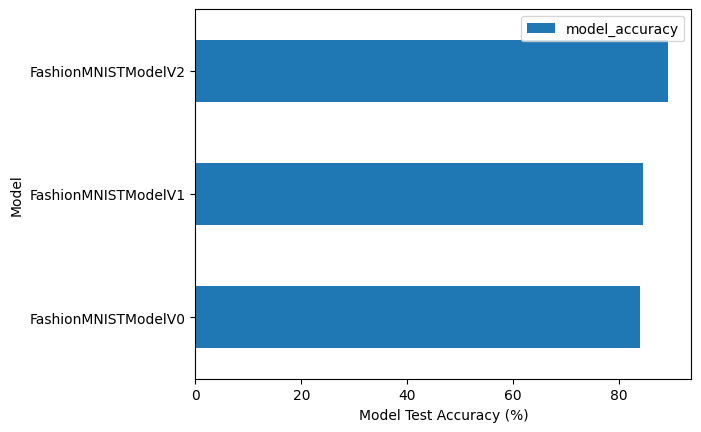

In [31]:
# Visualize our model results
dataFrame.plot.barh(x='model_name', y='model_accuracy')
plt.xlabel("Model Test Accuracy (%)")
plt.ylabel("Model")

## 7. Make & Evaluate Random Predictions with Best Model

In [32]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device:torch.device=device):
  
  pred_probs_list = []
  model.to(device)

  model.eval()
  with torch.inference_mode():
    for sample in data:
      # 1. Prepare the sample (add a batch dimensions and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # 2. Forward Pass -> Raw Logits
      pred_logit = model.forward(sample)

      # 3. Raw Logits -> Prediction Probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # 4. Add Append
      pred_probs_list.append(pred_prob.cpu())
  
  return torch.stack(pred_probs_list)

In [33]:
import random
random.seed(42)

test_samples, test_labels = [], []
for sample, label in random.sample(list(test_data), k=20):
  test_samples.append(sample)
  test_labels.append(label)

In [34]:
predictions = make_prediction(model=convNets_model,
                              data=test_samples)

predictions = predictions.argmax(dim=1)

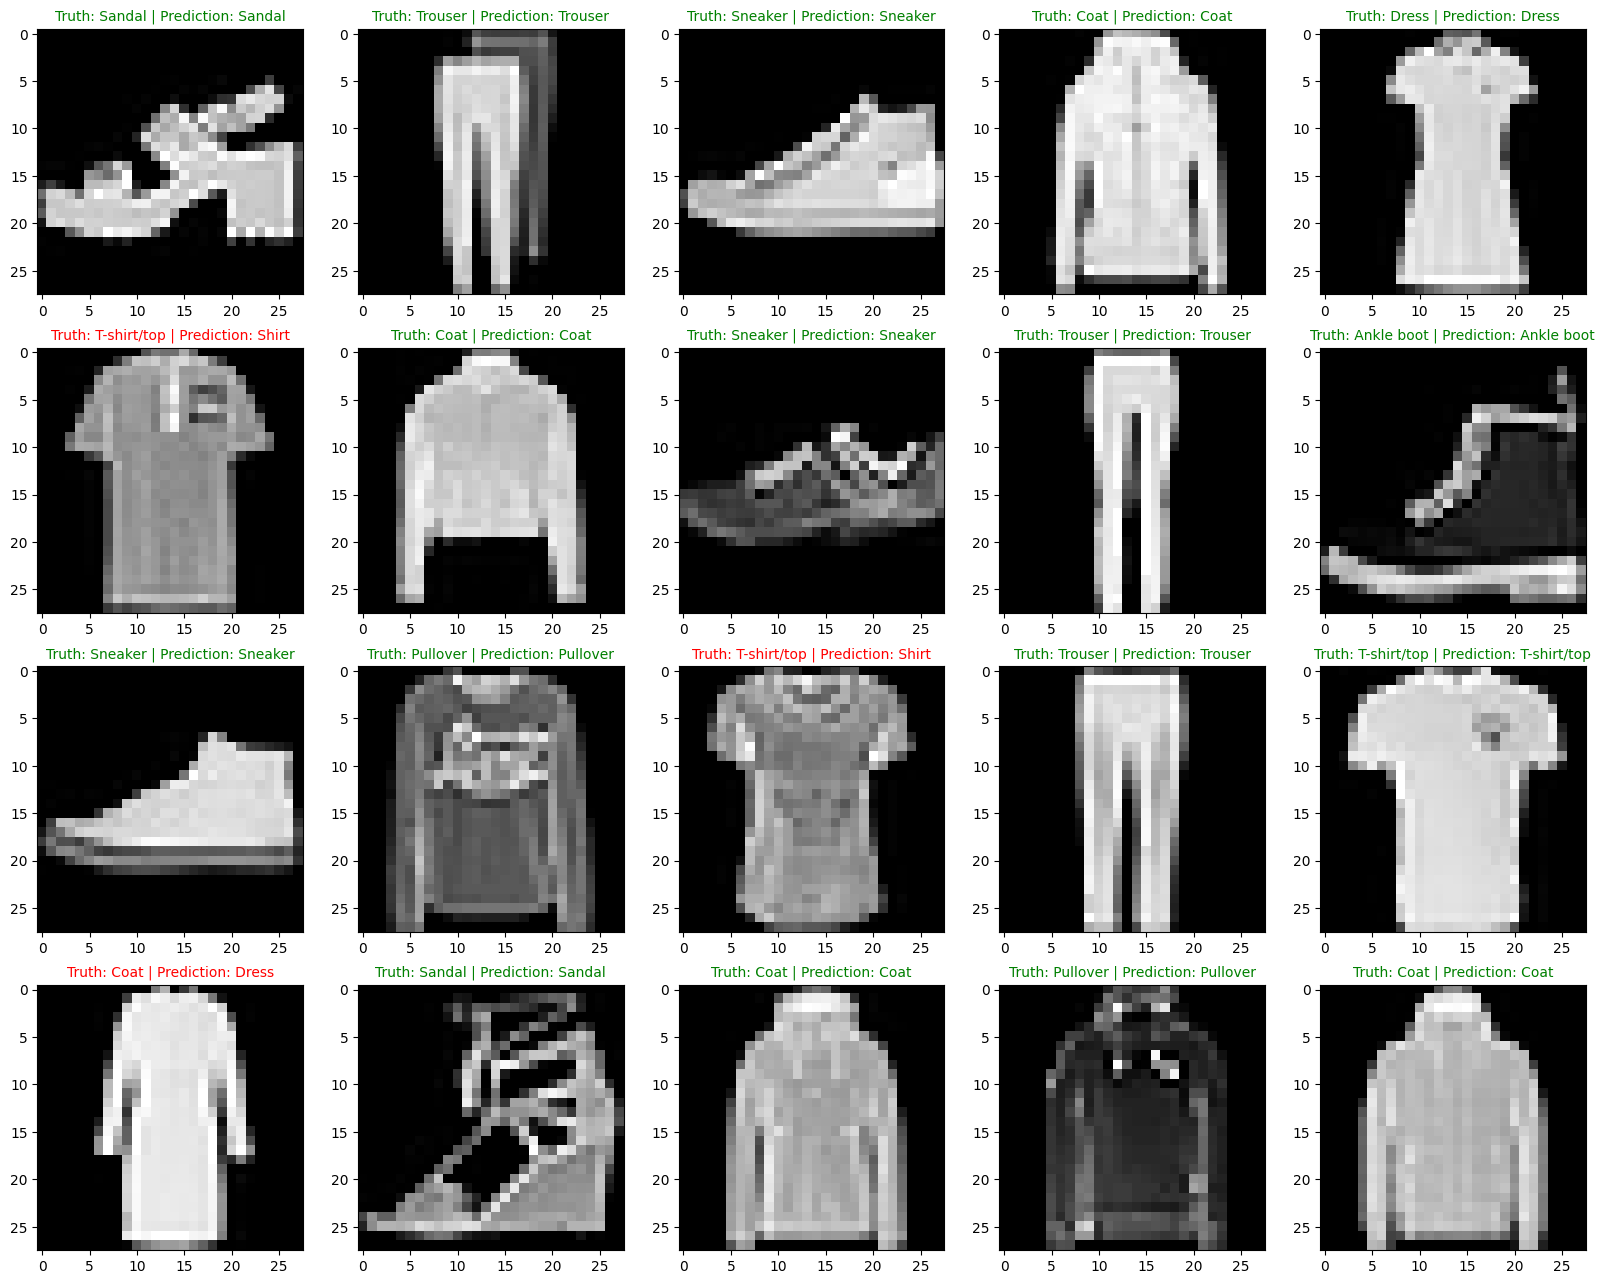

In [35]:
plt.figure(figsize=(20, 20))
number_of_rows, number_of_columns = 5, 5

for idx, samples in enumerate(test_samples):
  # 1. Create Subplots
  plt.subplot(number_of_rows, number_of_columns, idx+1)

  # 2. Plot Target Image
  plt.imshow(samples.squeeze(), cmap='gray')

  # 3. Find Predictions
  pred_label = class_names[predictions[idx]]

  # 4. Ground Truth Label
  ground_truth = class_names[test_labels[idx]]

  # 5. Create a Title
  text_title = f"Truth: {ground_truth} | Prediction: {pred_label}"

  # 6. Set Color
  color = 'green' if (ground_truth == pred_label) else 'red'

  # 7. Set Title
  plt.title(text_title, fontsize=10, color=color)

## 8. Generating a Confusion Matrix (CM) for Further Prediction Evaluation

In [36]:
# Import tqdm.auto
from tqdm.auto import tqdm 

# 1. Make predictions with trained model
label_preds = []
convNets_model.eval()
with torch.inference_mode():
  for image, label in tqdm(test_dataloader, desc="Making Predictions..."):
    # Send the data and targets to target device
    image, label = image.to(device), label.to(device)
    # Do the forward pass
    label_logit = convNets_model(image)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    label_pred = torch.softmax(label_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    label_preds.append(label_pred.cpu())

# Concatenate list of predictions into a tensor
preds_tensor = torch.cat(label_preds)
preds_tensor

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 0, 0])

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.95      0.89      0.92      1000
           2       0.77      0.78      0.77      1000
           3       0.75      0.88      0.81      1000
           4       0.76      0.69      0.72      1000
           5       0.93      0.78      0.85      1000
           6       0.57      0.69      0.62      1000
           7       0.81      0.93      0.87      1000
           8       0.87      0.80      0.84      1000
           9       0.93      0.81      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



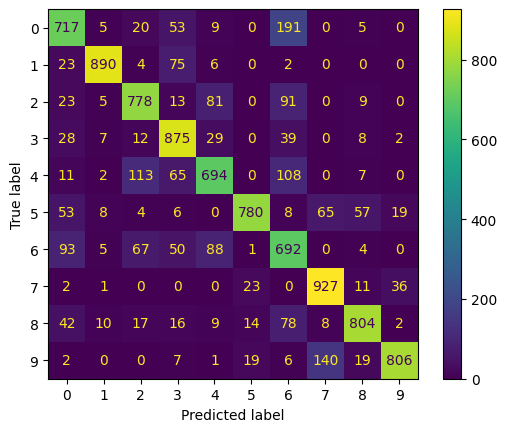

In [37]:
from helper_functions import confusion_matrix_and_classification_report, visualize_conf_matrix
matrix, report = confusion_matrix_and_classification_report(preds_tensor, test_data.targets)
visualize_conf_matrix(matrix)
print(report)

## 9. Save Best Performing Model

In [38]:
from helper_functions import save_model
save_model(convNets_model, 'pytorch_computer_vision')